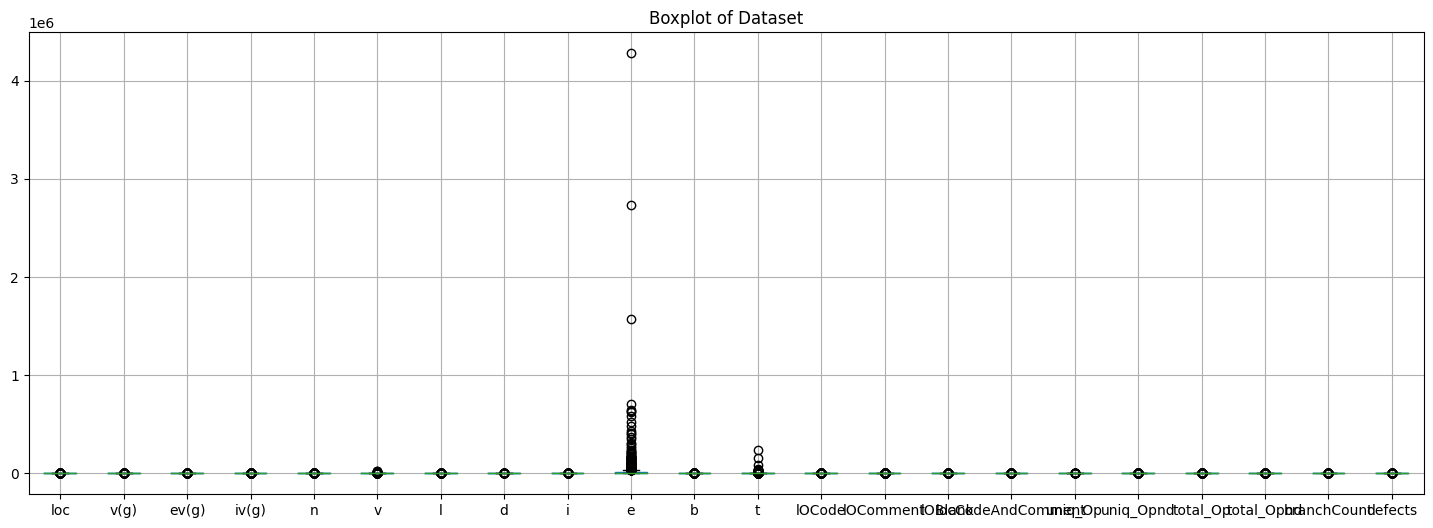

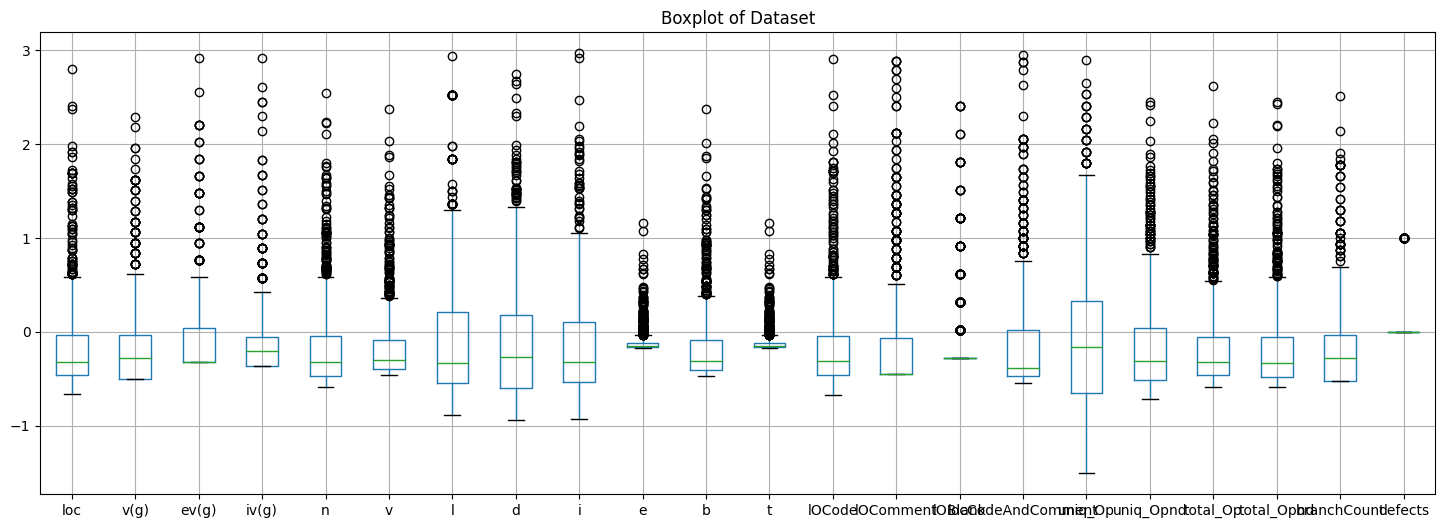

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Step 2: Load the dataset
data = pd.read_csv("PC1.csv")
data = data.replace('?', np.nan)
data = data.dropna()

plt.figure(figsize=(18, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()



numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
exclude_column = 'defects'  # Specify the column to exclude

columns_to_process = [col for col in numeric_columns if col != exclude_column]


scaler = StandardScaler()
data[columns_to_process] = scaler.fit_transform(data[columns_to_process])



z_scores = np.abs((data.loc[:, columns_to_process] - data.loc[:, columns_to_process].mean()) / data.loc[:, columns_to_process].std())
threshold = 3  # Set the threshold for outlier detection
data = data.loc[(z_scores < threshold).all(axis=1)]

plt.figure(figsize=(18, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()


In [3]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
5,2.371091,2.176372,0.760653,1.668768,2.543026,2.374678,-0.744891,2.297208,1.358303,1.159464,...,2.400672,2.596980,0.913636,2.623225,2.652350,2.242110,2.619786,2.423770,1.840141,True
8,0.159461,-0.392044,-0.317476,-0.206493,0.114610,0.012187,-0.200250,-0.334735,1.115171,-0.127194,...,0.165836,-0.161325,0.016450,0.102010,-0.648975,0.210312,0.058275,0.186602,-0.397778,True
9,0.357941,-0.280374,-0.317476,-0.362765,0.692563,0.495869,-0.608731,0.509716,0.795707,0.032340,...,0.344623,-0.256439,0.315512,0.264669,0.206924,0.554685,0.631480,0.766179,-0.276810,True
12,0.386295,-0.280374,-0.317476,-0.050221,0.352889,0.262269,-0.608731,0.586262,0.310008,-0.008597,...,0.374421,0.980043,0.315512,1.403282,0.940552,0.554685,0.291140,0.430024,-0.276810,True
14,-0.124081,-0.392044,-0.317476,-0.206493,-0.235204,-0.230611,-0.336411,-0.167559,-0.144592,-0.142883,...,-0.132142,1.931182,0.016450,0.183340,0.206924,-0.168497,-0.201458,-0.277060,-0.397778,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,-0.492686,-0.168704,0.221589,-0.362765,-0.463343,-0.399970,-0.336411,-0.126531,-0.726130,-0.161462,...,-0.489716,-0.446667,-0.282612,-0.385967,-0.404432,-0.616181,-0.434323,-0.497299,-0.155841,False
1105,-0.379269,-0.057033,0.401277,-0.362765,-0.377157,-0.342676,-0.540651,0.343153,-0.684289,-0.146494,...,-0.370525,-0.446667,-0.282612,-0.467296,0.084653,-0.547307,-0.344760,-0.416158,-0.034873,False
1106,-0.521040,-0.280374,0.041900,-0.362765,-0.508971,-0.422040,0.548632,-0.648878,-0.559613,-0.167213,...,-0.519514,-0.446667,-0.282612,-0.548626,-0.648975,-0.547307,-0.497017,-0.520482,-0.276810,False
1107,-0.152435,0.277977,0.401277,0.262322,-0.032413,-0.057388,-0.608731,0.460727,-0.173994,-0.086607,...,-0.132142,-0.446667,-0.282612,-0.467296,1.062823,0.107001,-0.049201,-0.010454,0.328033,False


In [4]:
X = data.drop('defects', axis=1)
y = data['defects'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)


In [6]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error: 0.18079331075832525
R-squared: -0.13412293406044196


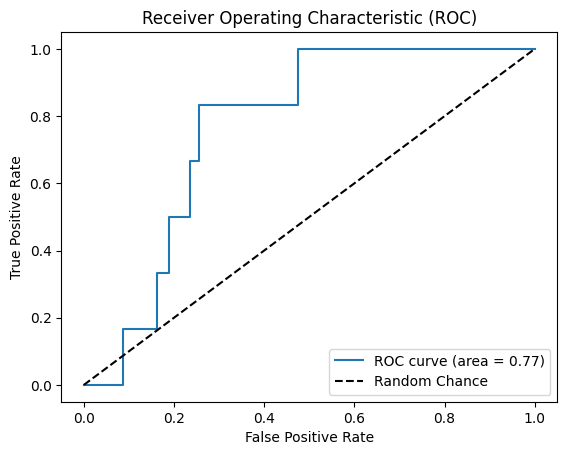

In [7]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9653465346534653
Confusion Matrix:
[[195   1]
 [  6   0]]
AUC: 0.7576530612244897
Root Mean Squared Error: 0.18615441264319968
R-squared: 0.9653465346534653


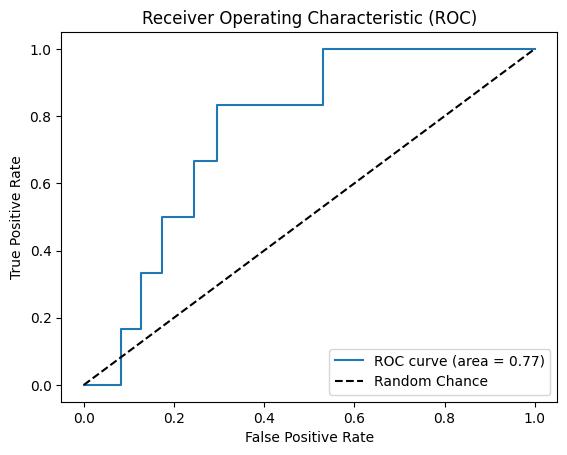

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(probability=True)

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.9702970297029703
Root Mean Squared Error: 0.1723454968864278
R-squared: 0.9702970297029703


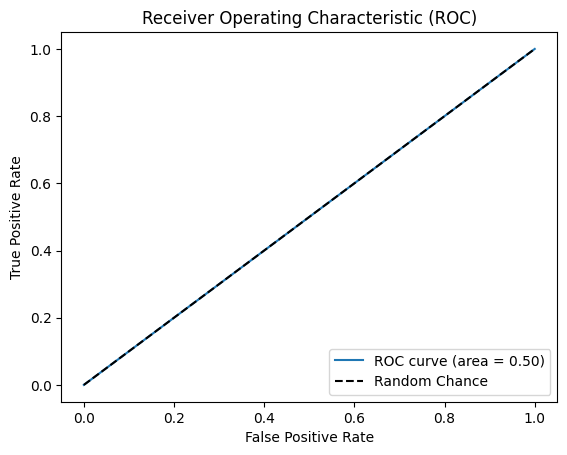

In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()